<a href="https://colab.research.google.com/github/acg12/Scholarship-Bootcamp/blob/main/CASE_FINAL_PROJECT_ML/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

From the previous sweetviz report, we can see a few interesting columns that seem to have interesting relationships with our target column, stroke. Let's illustrate them to learn more.

## Split the Data

In [ ]:
import pandas as pd 

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(4088, 12)
(1022, 12)


## Explore

### Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


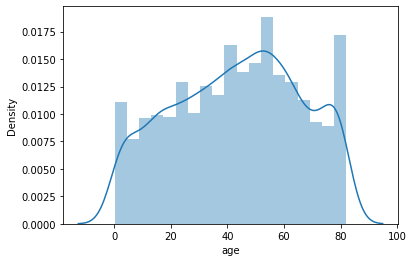

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(a=train['age'])
plt.show()

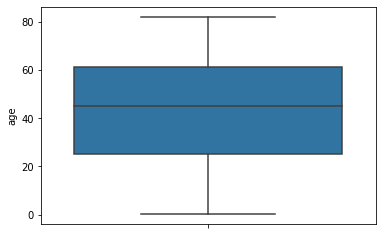

In [ ]:
sns.boxplot(data=train, y='age')
plt.show()

As we can see from the above charts, this "age" column is not quite normally distributed and does not have any outliers. We can try to transform this later.

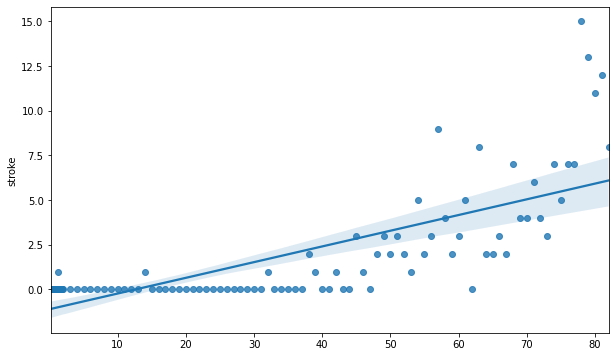

In [ ]:
count_of_strokes = train.groupby(['age'])['stroke'].sum()
ages = train['age'].sort_values().unique()

plt.figure(figsize=(10, 6))
sns.regplot(x=ages, y=count_of_strokes)
plt.show()

The column "age" seems to have a positive linear relationship with the target column. The older one gets, the more likely he/she will have stroke event.

What about "age" and "hypertension"?

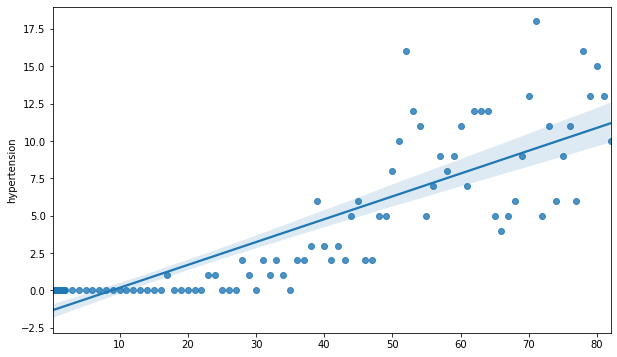

In [ ]:
count_of_hypertension = train.groupby(['age'])['hypertension'].sum()
ages = train['age'].sort_values().unique()

plt.figure(figsize=(10, 6))
sns.regplot(x=ages, y=count_of_hypertension)
plt.show()

Okay, looks like they also have a very linear relationship with each other. This may be because of the nature that older people tend to have hypertension. 

Let's test the age column with other columns.

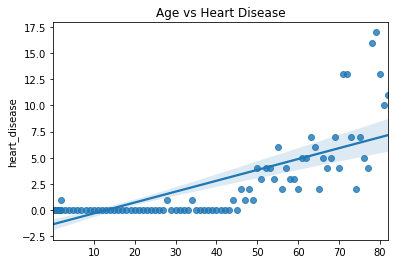

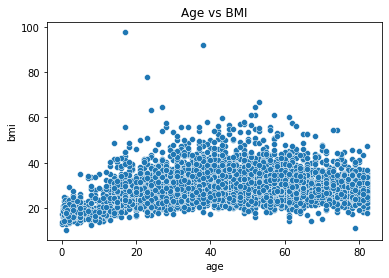

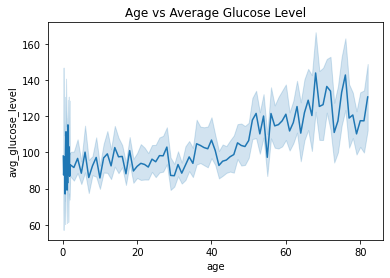

In [ ]:
# Age vs Heart Disease
count_of_heart_disease = train.groupby(['age'])['heart_disease'].sum()
ages = train['age'].sort_values().unique()

sns.regplot(x=ages, y=count_of_heart_disease)
plt.title('Age vs Heart Disease')
plt.show()

# Age vs BMI
sns.scatterplot(x=train['age'], y=train['bmi'])
plt.title('Age vs BMI')
plt.show()

# Age vs Average Glucose Level
sns.lineplot(x=train['age'], y=train['avg_glucose_level'])
plt.title('Age vs Average Glucose Level')
plt.show()

The age column seems to have a strong linear relationship with the heart_disease column, but no so much with the bmi column and average glucose level column.

### Hypertension

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


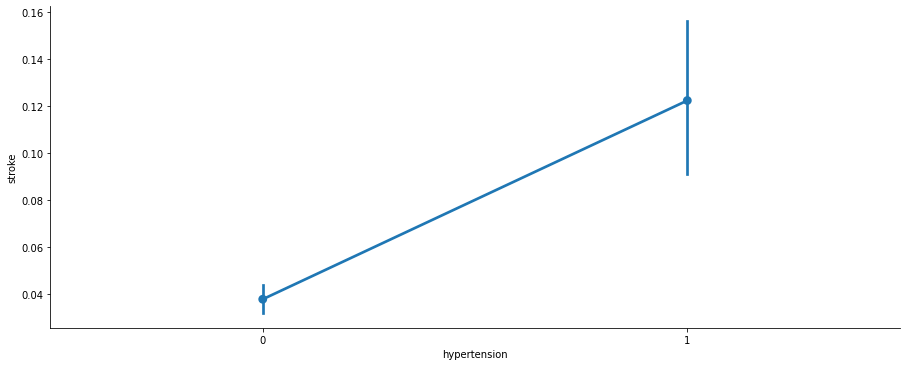

In [ ]:
sns.factorplot('hypertension', 'stroke', data=train, aspect=2.5)
plt.show()

Hypertension seems to have a strong linear relationship with the target column.

Let's try for hypertension and average glucose level.

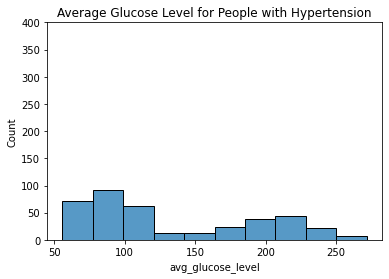

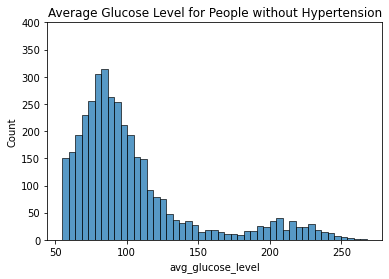

In [ ]:
hyper_avg = train[train['hypertension'] == 1]
not_hyper_avg = train[train['hypertension'] == 0]

sns.histplot(data=hyper_avg, x='avg_glucose_level')
plt.ylim([0, 400])
plt.title("Average Glucose Level for People with Hypertension")
plt.show()

sns.histplot(data=not_hyper_avg, x='avg_glucose_level')
plt.ylim([0, 400])
plt.title("Average Glucose Level for People without Hypertension")
plt.show()

It looks like hypertension and avg_glucose_level have a weak relationship with each other. People with hypertension don't seem to have higher average glucose levels than those without hypertension. Most people with hypertension have an average glucose level between 50 - 100, and so do most people without hypertension.

### Heart Disease

Let's look at the relationship between having an existing heart disease and stroke. We should see that people with an existing heart disease are more likely to get a stroke.

In [ ]:
not_heart_dis = train[train['heart_disease'] == 0]
heart_dis = train[train['heart_disease'] == 1]

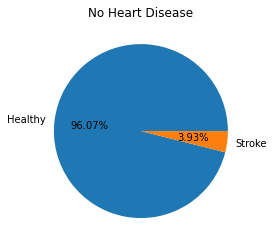

In [ ]:
stroke_not_heart = [len(not_heart_dis[not_heart_dis['stroke'] == 0]), len(not_heart_dis[not_heart_dis['stroke'] == 1])]

plt.pie(stroke_not_heart, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('No Heart Disease')
plt.show()

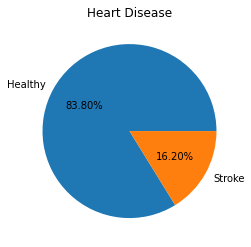

In [ ]:
stroke_heart = [len(heart_dis[heart_dis['stroke'] == 0]), len(heart_dis[heart_dis['stroke'] == 1])]

plt.pie(stroke_heart, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Heart Disease')
plt.show()

From the two charts here, we can see how having a heart disease can significantly increase the chance of someone having a stroke.

### Average Glucose Level

First, let's check the distribution and look for any outliers in this column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


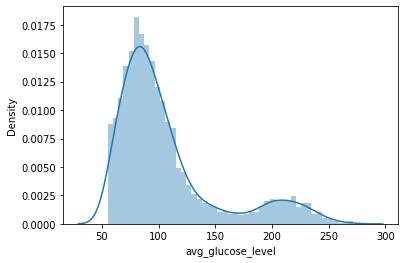

In [ ]:
sns.distplot(a=train['avg_glucose_level'])
plt.show()

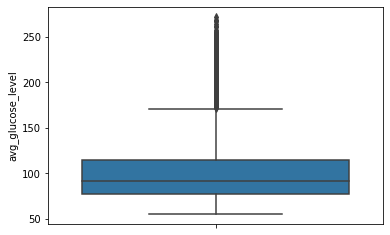

In [ ]:
sns.boxplot(data=train, y='avg_glucose_level')
plt.show()

This column is not normally distributed, and we can also see a number of outliers.

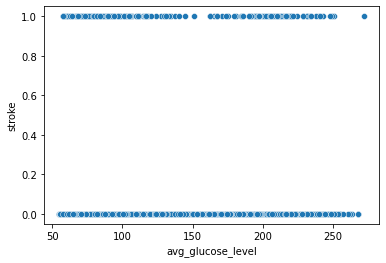

In [ ]:
sns.scatterplot(data=train, x='avg_glucose_level', y='stroke')

In [ ]:
train['avg_glucose_level'].nunique() / train.shape[0] * 100

81.2133072407045

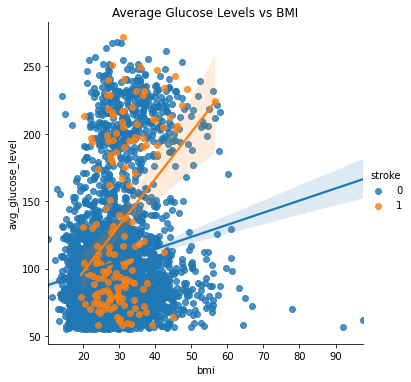

In [ ]:
sns.lmplot(x="bmi", y="avg_glucose_level", hue="stroke", data=train);
plt.title('Average Glucose Levels vs BMI')
plt.show()

About 78% of the data is made up of unique values. It also doesn't seem to impact the target column very much. But we're going to keep this column as we can see that it interacts with the bmi column.

### BMI

Let's look at the distribution and look for outliers in this column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


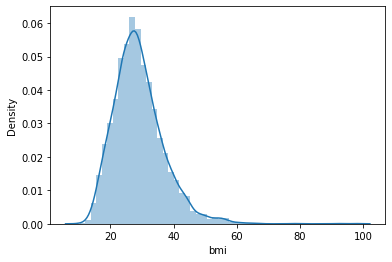

In [ ]:
sns.distplot(a=train['bmi'])

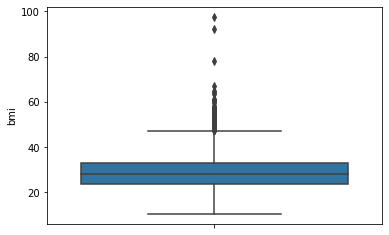

In [ ]:
sns.boxplot(data=train, y='bmi')

This column has a **log-normal distribution**. We can transform this later.

Let's see the relationship between bmi and stroke.

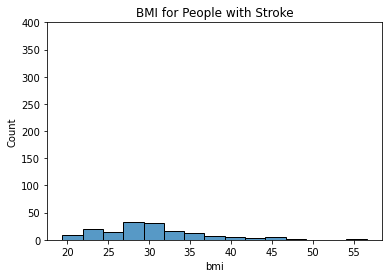

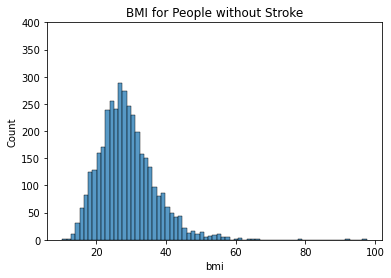

In [ ]:
stroke = train[train['stroke'] == 1]
not_stroke = train[train['stroke'] == 0]

sns.histplot(data=stroke, x='bmi')
plt.ylim([0, 400])
plt.title("BMI for People with Stroke")
plt.show()

sns.histplot(data=not_stroke, x='bmi')
plt.ylim([0, 400])
plt.title("BMI for People without Stroke")
plt.show()

In [ ]:
print(f"Mean BMI value for people WITH STROKE: {stroke['bmi'].mean()}")
print(f"Mean BMI value for people WITHOUT STROKE: {not_stroke['bmi'].mean()}")

Mean BMI value for people WITH STROKE: 30.599363057324844
Mean BMI value for people WITHOUT STROKE: 28.883814569536412


It looks like BMI values do seem to have a slight effect on the chance of someone having a stroke. People who have gotten a stroke seem to have a slightly higher BMI value on average than those who haven't. That means that having a higher BMI value does increase the risk of getting a stroke.

### Smoking Status

Let's look at how different smoking statuses affect whether someone gets a stroke or not.

In [ ]:
never_smoked = train[train['smoking_status'] == 'never smoked']
has_smoked = train[train['smoking_status'] == 'formerly smoked']
smokes = train[train['smoking_status'] == 'smokes']
unknown = train[train['smoking_status'] == 'Unknown']

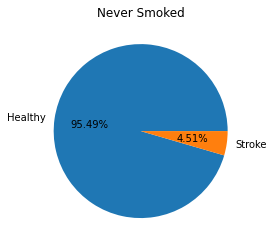

In [ ]:
stroke_never = [len(never_smoked[never_smoked['stroke'] == 0]), len(never_smoked[never_smoked['stroke'] == 1])]

plt.pie(stroke_never, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Never Smoked')
plt.show()

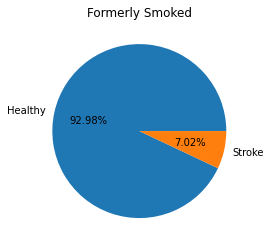

In [ ]:
stroke_former = [len(has_smoked[has_smoked['stroke'] == 0]), len(has_smoked[has_smoked['stroke'] == 1])]

plt.pie(stroke_former, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Formerly Smoked')
plt.show()

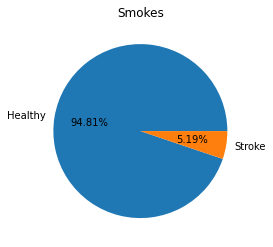

In [ ]:
stroke_smokes = [len(smokes[smokes['stroke'] == 0]), len(smokes[smokes['stroke'] == 1])]

plt.pie(stroke_smokes, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Smokes')
plt.show()

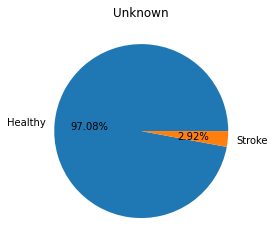

In [ ]:
stroke_unknown = [len(unknown[unknown['stroke'] == 0]), len(unknown[unknown['stroke'] == 1])]

plt.pie(stroke_unknown, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Unknown')
plt.show()

From these 4 charts we can see that "Unknown" has more healthy people than the other types of smoking statuses. But "Unknown" doesn't really give us any information, so we will have to do something about that later.

Other than the "unknown" status, among the other 3 statuses, the "never smoked" status has the most number of healthy people. It just goes to show that whether you formerly smoked or are currently smoking, you have a same higher risk of getting stroke than those who never smoked before.

### Residence Type

In [ ]:
train['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
rural = train[train['Residence_type'] == 'Rural']
urban = train[train['Residence_type'] == 'Urban']

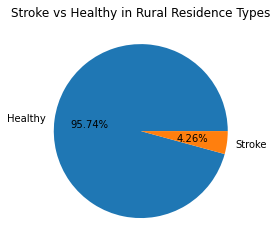

In [ ]:
stroke_rural = [len(rural[rural['stroke'] == 0]), len(rural[rural['stroke'] == 1])]

plt.pie(stroke_rural, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Stroke vs Healthy in Rural Residence Types')
plt.show()

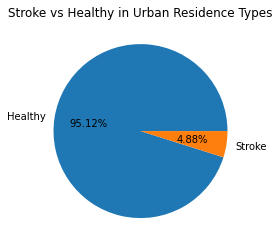

In [ ]:
stroke_urban = [len(urban[urban['stroke'] == 0]), len(urban[urban['stroke'] == 1])]

plt.pie(stroke_urban, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Stroke vs Healthy in Urban Residence Types')
plt.show()

As we can see from the two charts above, it doesn't seem like residence type has any affect to whether someone gets a stroke or not.

### Work Type

The type of work someone does may contribute to a higher chance of getting a stroke. Let's explore the relationship between the columns "work type" and "stroke" below.

In [ ]:
train['work_type'].unique()

array(['Self-employed', 'Private', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
self_employ = train[train['work_type'] == 'Self-employed']
private = train[train['work_type'] == 'Private']
govt = train[train['work_type'] == 'Govt_job']
children = train[train['work_type'] == 'children']
never = train[train['work_type'] == 'Never_worked']

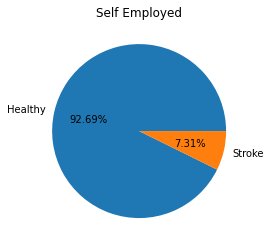

In [ ]:
values = [len(self_employ[self_employ['stroke'] == 0]), len(self_employ[self_employ['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Self Employed')
plt.show()

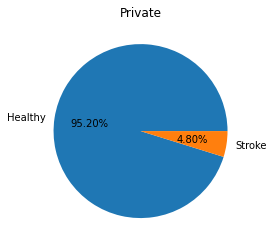

In [ ]:
values = [len(private[private['stroke'] == 0]), len(private[private['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Private')
plt.show()

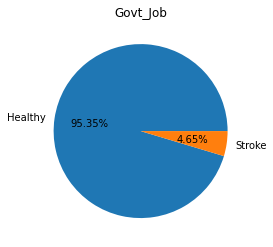

In [ ]:
values = [len(govt[govt['stroke'] == 0]), len(govt[govt['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Govt_Job')
plt.show()

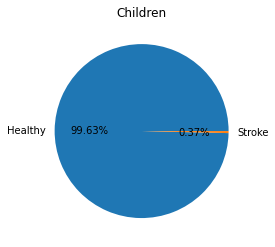

In [ ]:
values = [len(children[children['stroke'] == 0]), len(children[children['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Children')
plt.show()

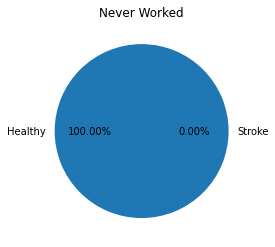

In [ ]:
values = [len(never[never['stroke'] == 0]), len(never[never['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Never Worked')
plt.show()

From the five charts above, we can see that people that have children or never worked before have a lower chance of getting a stroke than those who do work. But the difference isn't so significant.

### Ever Married

Let's see the relationship between the columns "ever married" and "stroke".

In [ ]:
train['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
married = train[train['ever_married'] == 'Yes']
not_married = train[train['ever_married'] == 'No']

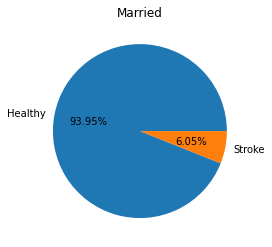

In [ ]:
values = [len(married[married['stroke'] == 0]), len(married[married['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Married')
plt.show()

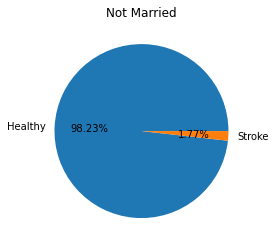

In [ ]:
values = [len(not_married[not_married['stroke'] == 0]), len(not_married[not_married['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Not Married')
plt.show()

From the two charts above, we can see a slight difference between the two. Those who aren't married have a slightly lower chance of getting a stroke (~5% lower).

### Gender

Let's see whether your gender contributes to the risk of getting a stroke.

There are 3 types of genders here, but 'Other' only consists of 1 data, so we won't visualize it here.

In [ ]:
female = train[train['gender'] == 'Female']
male = train[train['gender'] == 'Male']

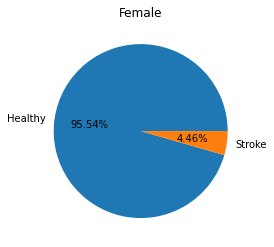

In [ ]:
values = [len(female[female['stroke'] == 0]), len(female[female['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Female')
plt.show()

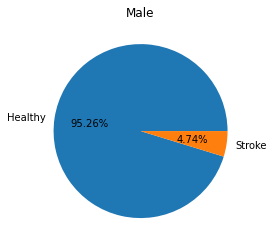

In [ ]:
values = [len(male[male['stroke'] == 0]), len(male[male['stroke'] == 1])]

plt.pie(values, labels=['Healthy', 'Stroke'], autopct='%.2f%%')
plt.title('Male')
plt.show()

So, it turns out that gender doesn't affect the risk of getting a stroke.

### Heatmap

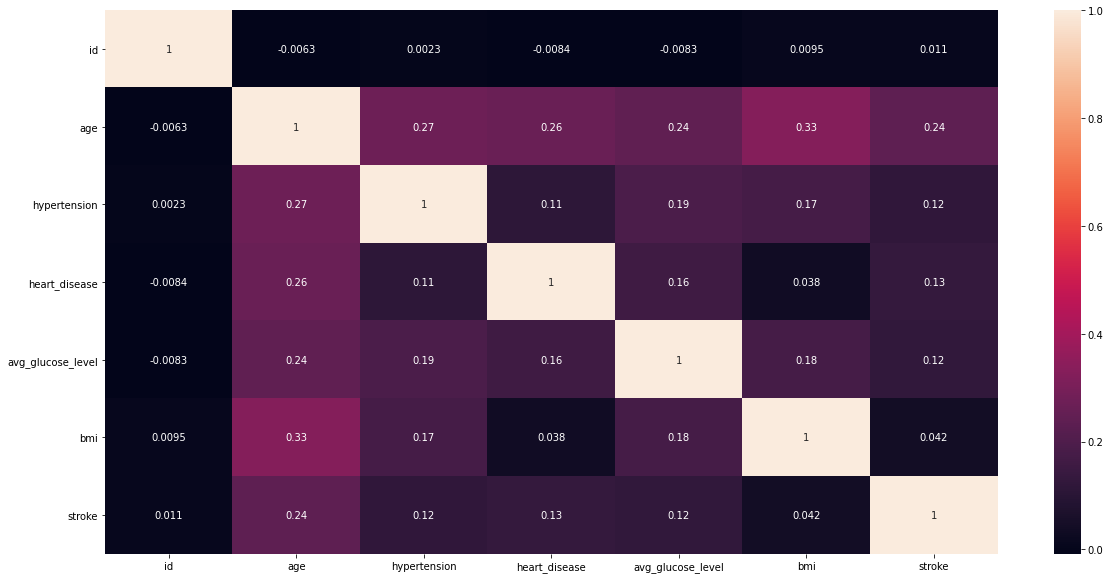

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

The columns 'bmi' and 'age' has a relatively strong relationship with each other, and the one that has the weakest relationship with 'stroke' is 'bmi'. The column with the strongest relationship with 'stroke' is 'age'.